<a href="https://colab.research.google.com/github/DerinOgrenme2021/AbdullahZengin/blob/main/Mnist_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) 

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils




In [4]:
nb_classes = 10


(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


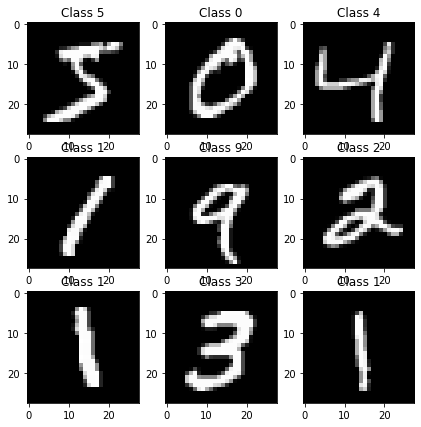

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [12]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [13]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
                           
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) 

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [21]:
model.fit(X_train, Y_train, batch_size=128, epochs=6,  verbose=1, validation_data=(X_test, Y_test))

Epoch 1/6
469/469 [==============================] - 19s 13ms/step - loss: 1.3536 - val_loss: 0.3888
Epoch 2/6
469/469 [==============================] - 6s 12ms/step - loss: 0.3757 - val_loss: 0.2835
Epoch 3/6
469/469 [==============================] - 6s 12ms/step - loss: 0.2928 - val_loss: 0.2303
Epoch 4/6
469/469 [==============================] - 6s 12ms/step - loss: 0.2361 - val_loss: 0.1896
Epoch 5/6
469/469 [==============================] - 6s 12ms/step - loss: 0.1974 - val_loss: 0.1657
Epoch 6/6
469/469 [==============================] - 6s 12ms/step - loss: 0.1696 - val_loss: 0.1422


In [24]:
score = model.evaluate(X_test, Y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.1422


In [28]:

model.evaluate(X_train,Y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1347


0.13472381234169006